# Name : Kartabya Krishna
# Reg No : 210968244
# Batch : B2
# Date : 20230824

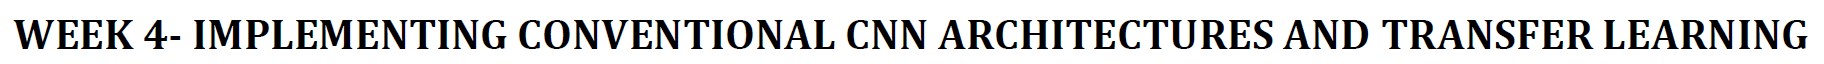

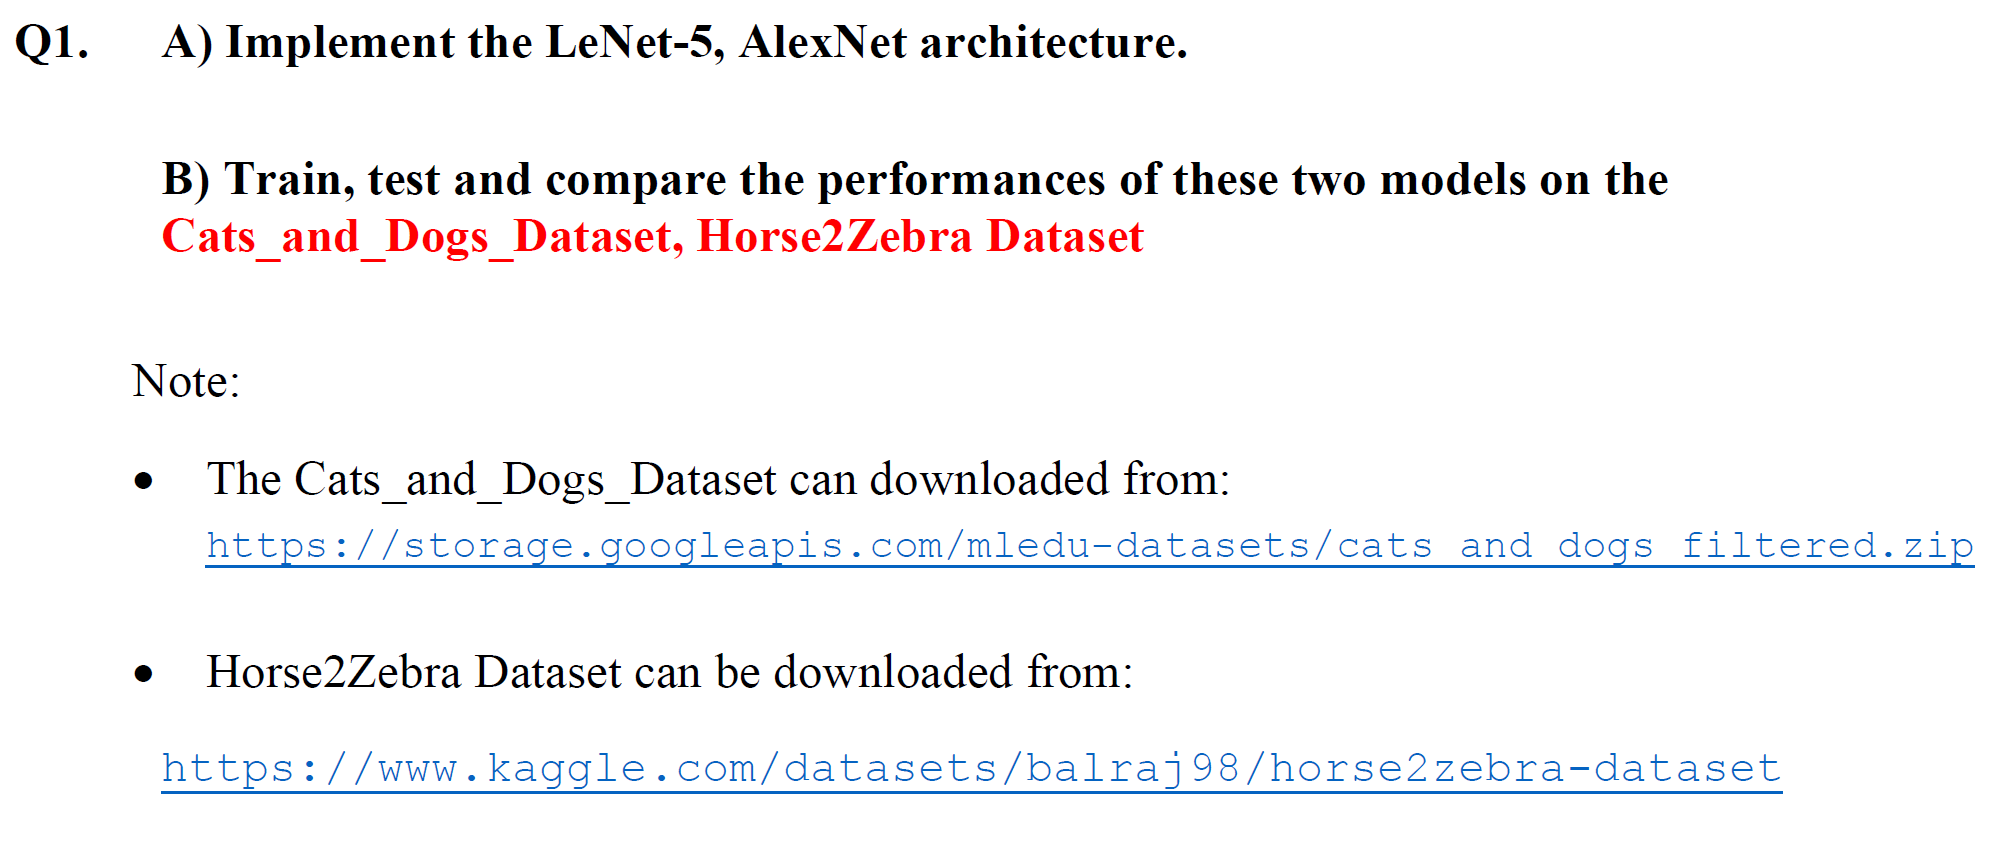

In [ ]:
# Import TensorFlow for deep learning functionality
import tensorflow as tf
# Import Sequential to create a sequential model
from tensorflow.keras.models import Sequential
# Import layers for building the neural network
from tensorflow.keras.layers import Conv2D, Dense, AveragePooling2D, Flatten, MaxPooling2D
# Import ImageDataGenerator for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Import pandas for data handling
import pandas as pd
# Import numpy for numerical operations
import numpy as np
# Import seaborn for data visualization
import seaborn as sns
# Import matplotlib for additional data visualization
import matplotlib.pyplot as plt
# Import image preprocessing functions
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
# Import Adam optimizer for training the model
from tensorflow.keras.optimizers import Adam
# Import plot_model for visualizing the model architecture
from tensorflow.keras.utils import plot_model
# Import os for working with file paths and directories
import os

In [ ]:
# Initialize empty lists to store horse and zebra images
horse = []
zebra = []

# Loop through files in the 'trainA' directory
for fname in os.listdir('./horse2zebra/train/trainA'):
    # Load an image from the 'trainA' directory
    img = load_img(f'./horse2zebra/train/trainA/{fname}')

    # Convert the loaded image to a NumPy array and append it to the 'horse' list
    horse.append(img_to_array(img))

# Loop through files in the 'trainB' directory
for fname in os.listdir('./horse2zebra/train/trainB'):
    # Load an image from the 'trainB' directory
    img = load_img(f'./horse2zebra/train/trainB/{fname}')

    # Convert the loaded image to a NumPy array and append it to the 'zebra' list
    zebra.append(img_to_array(img))

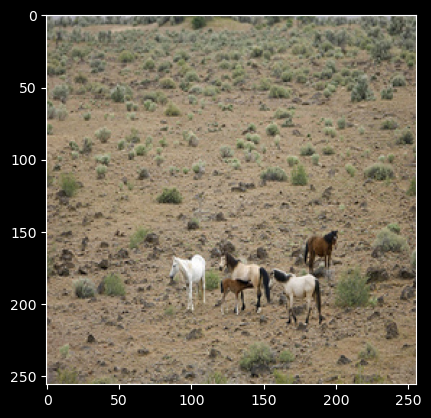

In [ ]:
# Load and display an image from the specified path
plt.imshow(plt.imread('horse2zebra/train/trainA/n02381460_2.jpg'))

In [ ]:
# Create an ImageDataGenerator for training data with rescaling
train_datagen = ImageDataGenerator(rescale=1./255)

# Create an ImageDataGenerator for validation data with rescaling
val_datagen = ImageDataGenerator(rescale=1./255)

# Create an ImageDataGenerator for test data with rescaling
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Define the base directory for the dataset
base_dir = './horse2zebra'

# Create paths for different data directories
train_dir = os.path.join(base_dir, 'train')  # Training data directory
validation_dir = os.path.join(base_dir, 'validation')  # Validation data directory
test_dir = os.path.join(base_dir, 'test')  # Test data directory

# Create paths for specific horse and zebra data directories within the training, validation, and test sets
train_horse_dir = os.path.join(train_dir, 'trainA')  # Directory for training horse images
train_zebra_dir = os.path.join(train_dir, 'trainB')  # Directory for training zebra images
validation_horse_dir = os.path.join(validation_dir, 'valA')  # Directory for validation horse images
validation_zebra_dir = os.path.join(validation_dir, 'valB')  # Directory for validation zebra images
test_horse_dir = os.path.join(test_dir, 'testA')  # Directory for test horse images
test_zebra_dir = os.path.join(test_dir, 'testB')  # Directory for test zebra images


In [ ]:
# Create a data generator for training data
train_generator = train_datagen.flow_from_directory(
    train_dir,              # Directory containing training images
    target_size=(28, 28),   # Resize images to a target size of (28, 28)
    batch_size=20,          # Number of images in each batch
    class_mode='categorical'  # Mode for handling labels (categorical for one-hot encoded labels)
)


Found 2101 images belonging to 2 classes.


In [ ]:
# Create a data generator for validation data
val_generator = val_datagen.flow_from_directory(
    validation_dir,         # Directory containing validation images
    target_size=(28, 28),  # Resize images to a target size of (28, 28)
    batch_size=20,         # Number of images in each batch
    class_mode='categorical'  # Mode for handling labels (categorical for one-hot encoded labels)
)


Found 300 images belonging to 2 classes.


In [ ]:
# Create a data generator for test data
test_generator = test_datagen.flow_from_directory(
    test_dir,               # Directory containing test images
    target_size=(28, 28),   # Resize images to a target size of (28, 28)
    batch_size=20,          # Number of images in each batch
    class_mode='categorical'  # Mode for handling labels (categorical for one-hot encoded labels)
)


Found 260 images belonging to 2 classes.


In [ ]:
# Create a Sequential model called "LeNet"
lenet_model = Sequential([
    Input(shape=(28, 28, 3)),  # Input layer with a shape of (28, 28, 3) for RGB images

    # Convolutional Layer 1: 6 filters, each with a 5x5 kernel, "same" padding, and "tanh" activation
    Conv2D(6, (5, 5), padding="same", activation="tanh"),

    # Average Pooling Layer 1: Reduces spatial dimensions with a stride of 2
    AveragePooling2D(strides=2),

    # Convolutional Layer 2: 16 filters, each with a 5x5 kernel, "valid" padding, and "tanh" activation
    Conv2D(16, (5, 5), padding="valid", activation="tanh"),

    # Average Pooling Layer 2: Reduces spatial dimensions with a stride of 2
    AveragePooling2D(strides=2),

    # Flatten Layer: Flattens the output to a 1D vector
    Flatten(),

    # Fully Connected Layer 1 with 120 neurons and "sigmoid" activation
    Dense(120, activation="sigmoid"),

    # Fully Connected Layer 2 with 84 neurons and "sigmoid" activation
    Dense(84, activation="sigmoid"),

    # Output Layer with 2 neurons (assuming a binary classification task) and "sigmoid" activation
    Dense(2, activation="sigmoid"),
], name="LeNet")

# Display a summary of the LeNet model
lenet_model.summary()


Model: "LeNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_2 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)               48120 

In [ ]:
# Compile the LeNet model
lenet_model.compile(
    loss='binary_crossentropy',       # Binary cross-entropy loss function for binary classification
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with a learning rate of 0.001
    metrics=['acc']                   # Monitor accuracy during training
)


In [ ]:
# Train the LeNet model using the training generator
lenet_hist = lenet_model.fit(
    train_generator,         # Training data generator
    epochs=20,               # Number of training epochs
    validation_data=val_generator  # Validation data generator for monitoring validation performance
)


Epoch 1/20


2023-08-26 22:14:49.719804: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-26 22:14:50.341346: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-26 22:14:50.855660: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7faac00671f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-26 22:14:50.855799: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2023-08-26 22:14:50.909224: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-26 22:14:51.477414: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-26 22:14:51.607507: I ./tensorflow/compiler/jit/device_

106/106 [==============================] - 28s 215ms/step - loss: 0.6628 - acc: 0.6030 - val_loss: 0.6666 - val_acc: 0.6667
Epoch 2/20
106/106 [==============================] - 23s 213ms/step - loss: 0.5918 - acc: 0.7049 - val_loss: 0.6105 - val_acc: 0.7033
Epoch 3/20
106/106 [==============================] - 23s 212ms/step - loss: 0.5581 - acc: 0.7344 - val_loss: 0.5697 - val_acc: 0.7467
Epoch 4/20
106/106 [==============================] - 21s 198ms/step - loss: 0.5326 - acc: 0.7520 - val_loss: 0.5739 - val_acc: 0.7233
Epoch 5/20
106/106 [==============================] - 21s 200ms/step - loss: 0.5180 - acc: 0.7611 - val_loss: 0.5733 - val_acc: 0.7200
Epoch 6/20
106/106 [==============================] - 22s 206ms/step - loss: 0.5053 - acc: 0.7558 - val_loss: 0.5449 - val_acc: 0.7533
Epoch 7/20
106/106 [==============================] - 22s 210ms/step - loss: 0.4957 - acc: 0.7692 - val_loss: 0.6046 - val_acc: 0.6767
Epoch 8/20
106/106 [==============================] - 24s 230ms/st

In [ ]:
# Evaluate the LeNet model on the test dataset using a batch size of 32
lenet_model.evaluate(test_generator, batch_size=32)


13/13 [==============================] - 4s 319ms/step - loss: 0.4200 - acc: 0.8038


[0.4199732542037964, 0.8038461804389954]

In [ ]:
# Create a data generator for training data
train_generator = train_datagen.flow_from_directory(
    train_dir,              # Directory containing training images
    target_size=(227, 227),  # Resize images to a target size of (227, 227)
    batch_size=20,          # Number of images in each batch
    class_mode='categorical'  # Mode for handling labels (categorical for one-hot encoded labels)
)


Found 2101 images belonging to 2 classes.


In [ ]:
# Create a data generator for validation data
val_generator = val_datagen.flow_from_directory(
    validation_dir,         # Directory containing validation images
    target_size=(227, 227),  # Resize images to a target size of (227, 227)
    batch_size=20,          # Number of images in each batch
    class_mode='categorical'  # Mode for handling labels (categorical for one-hot encoded labels)
)


Found 300 images belonging to 2 classes.


In [ ]:
# Create a data generator for test data
test_generator = test_datagen.flow_from_directory(
    test_dir,               # Directory containing test images
    target_size=(227, 227),  # Resize images to a target size of (227, 227)
    batch_size=20,          # Number of images in each batch
    class_mode='categorical'  # Mode for handling labels (categorical for one-hot encoded labels)
)


Found 260 images belonging to 2 classes.


In [ ]:
# Create a Sequential model called "AlexNet"
alexnet_model = Sequential([
    Input(shape=(227, 227, 3)),  # Input layer with a shape of (227, 227, 3) for RGB images

    # Convolutional Layer 1: 96 filters, each with an 11x11 kernel, strides of (4, 4), "valid" padding, and "tanh" activation
    Conv2D(96, (11, 11), strides=(4, 4), padding="valid", activation="tanh"),

    # Max Pooling Layer 1: Reduces spatial dimensions with a 3x3 pooling window and strides of 2
    MaxPooling2D(pool_size=(3, 3), strides=2),

    # Convolutional Layer 2: 256 filters, each with a 5x5 kernel, "same" padding, and "tanh" activation
    Conv2D(256, (5, 5), padding="same", activation="tanh"),

    # Max Pooling Layer 2: Reduces spatial dimensions with a 3x3 pooling window and strides of 2
    MaxPooling2D(pool_size=(3, 3), strides=2),

    # Convolutional Layer 3: 384 filters, each with a 3x3 kernel, "same" padding, and "tanh" activation
    Conv2D(384, (3, 3), padding="same", activation="tanh"),

    # Convolutional Layer 4: 384 filters, each with a 3x3 kernel, "same" padding, and "tanh" activation
    Conv2D(384, (3, 3), padding="same", activation="tanh"),

    # Convolutional Layer 5: 256 filters, each with a 3x3 kernel, "same" padding, and "tanh" activation
    Conv2D(256, (3, 3), padding="same", activation="tanh"),

    # Max Pooling Layer 3: Reduces spatial dimensions with a 3x3 pooling window and strides of 2
    MaxPooling2D(pool_size=(3, 3), strides=2),

    # Flatten Layer: Flattens the output to a 1D vector
    Flatten(),

    # Fully Connected Layer 1 with 4096 neurons and "sigmoid" activation
    Dense(4096, activation="sigmoid"),

    # Fully Connected Layer 2 with 4096 neurons and "sigmoid" activation
    Dense(4096, activation="sigmoid"),

    # Output Layer with 2 neurons (assuming a binary classification task) and "sigmoid" activation
    Dense(2, activation="sigmoid"),
], name="AlexNet")

# Display a summary of the AlexNet model
alexnet_model.summary()


Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_5 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 384)       1327

In [ ]:
# Compile the AlexNet model
alexnet_model.compile(
    loss='binary_crossentropy',       # Binary cross-entropy loss function for binary classification
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with a learning rate of 0.001
    metrics=['acc']                   # Monitor accuracy during training
)


In [ ]:
# Train the AlexNet model using the training generator
alexnet_hist = alexnet_model.fit(
    train_generator,         # Training data generator
    epochs=20,               # Number of training epochs
    validation_data=val_generator  # Validation data generator for monitoring validation performance
)


Epoch 1/20
106/106 [==============================] - 34s 268ms/step - loss: 1.0002 - acc: 0.5079 - val_loss: 0.9256 - val_acc: 0.5000
Epoch 2/20
106/106 [==============================] - 24s 223ms/step - loss: 0.8018 - acc: 0.5140 - val_loss: 0.7061 - val_acc: 0.5000
Epoch 3/20
106/106 [==============================] - 24s 227ms/step - loss: 0.7187 - acc: 0.5388 - val_loss: 0.7098 - val_acc: 0.5000
Epoch 4/20
106/106 [==============================] - 25s 234ms/step - loss: 0.7109 - acc: 0.5264 - val_loss: 0.7920 - val_acc: 0.5000
Epoch 5/20
106/106 [==============================] - 23s 219ms/step - loss: 0.7365 - acc: 0.5331 - val_loss: 0.8013 - val_acc: 0.5000
Epoch 6/20
106/106 [==============================] - 26s 246ms/step - loss: 0.7036 - acc: 0.5340 - val_loss: 0.7572 - val_acc: 0.5000
Epoch 7/20
106/106 [==============================] - 25s 236ms/step - loss: 0.7066 - acc: 0.5474 - val_loss: 0.7166 - val_acc: 0.5000
Epoch 8/20
106/106 [==============================] - 2

In [ ]:
# Evaluate the AlexNet model on the test dataset
alexnet_model.evaluate(test_generator)


13/13 [==============================] - 3s 184ms/step - loss: 0.6913 - acc: 0.5385


[0.6913493275642395, 0.5384615659713745]